<a href="https://colab.research.google.com/github/shreekanthsenthil/SQL-Injection-Detection/blob/master/sqli_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn import preprocessing , neighbors ,svm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from imblearn.under_sampling import RandomUnderSampler

In [94]:
df1 = pd.read_csv("./Data_2/SQLiV3.csv",encoding='utf-8') 
df1.head()

,Sentence,Label,Unnamed: 2,Unnamed: 3
0,""" or pg_sleep ( __TIME__ ) --",1,NaN,NaN
1,create user name identified by pass123 tempora...,NaN,1,NaN
2,AND 1 = utl_inaddr.get_host_address ( ...,1,NaN,NaN
3,select * from users where id = '1' or @ @1 ...,1,NaN,NaN
4,"select * from users where id = 1 or 1#"" ( ...",1,NaN,NaN


In [95]:
del df1['Unnamed: 2']
del df1['Unnamed: 3']

In [101]:
df1.info('Label')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30649 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  30649 non-null  object
 1   Label     30649 non-null  object
dtypes: object(2)
memory usage: 718.3+ KB


In [102]:
df1.describe()

,Sentence,Label
count,30649,30649
unique,30627,28
top,#NAME?,0
freq,8,19268


In [103]:
df1['Label'].isna().sum() # Count NaN label values

0

In [104]:
df1= df1.dropna() # Remove Nan values.

In [105]:
df1 = df1.drop(df1[(df1['Label'] != '0') & (df1['Label'] != '1')].index) # Dropping the label values, that are different from 0 or 1.

In [106]:
df1['Label'] = df1['Label'].astype('int') # Convert the label type to integer.

In [107]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30609 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  30609 non-null  object
 1   Label     30609 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 597.8+ KB


In [136]:
(11341/(11341+19268))*100

37.051194093240554

In [109]:
df1.Label.value_counts()

0    19268
1    11341
Name: Label, dtype: int64

In [110]:
df1=df1.rename(columns={'Sentence':'Query'})

In [111]:
df1

,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
5,select name from syscolumns where id = ...,1
...,...,...
30914,DELETE FROM door WHERE grow = 'small',0
30915,DELETE FROM tomorrow,0
30916,SELECT wide ( s ) FROM west,0
30917,SELECT * FROM ( SELECT slide FROM breath ),0


In [113]:
df1['Length']=df1.Query.map(len)
df1

,Query,Label,Length
0,""" or pg_sleep ( __TIME__ ) --",1,33
2,AND 1 = utl_inaddr.get_host_address ( ...,1,218
3,select * from users where id = '1' or @ @1 ...,1,90
4,"select * from users where id = 1 or 1#"" ( ...",1,85
5,select name from syscolumns where id = ...,1,109
...,...,...,...
30914,DELETE FROM door WHERE grow = 'small',0,37
30915,DELETE FROM tomorrow,0,20
30916,SELECT wide ( s ) FROM west,0,28
30917,SELECT * FROM ( SELECT slide FROM breath ),0,44


In [114]:
df1.dropna(axis=0,how="all",inplace=True)

In [115]:
df1

,Query,Label,Length
0,""" or pg_sleep ( __TIME__ ) --",1,33
2,AND 1 = utl_inaddr.get_host_address ( ...,1,218
3,select * from users where id = '1' or @ @1 ...,1,90
4,"select * from users where id = 1 or 1#"" ( ...",1,85
5,select name from syscolumns where id = ...,1,109
...,...,...,...
30914,DELETE FROM door WHERE grow = 'small',0,37
30915,DELETE FROM tomorrow,0,20
30916,SELECT wide ( s ) FROM west,0,28
30917,SELECT * FROM ( SELECT slide FROM breath ),0,44


In [116]:
def cal_puncndop(df,col,punop_col,l):
  df1 = df[[col]].copy()
  for i, query in enumerate(df[col]):
    count = 0
    li = list(query)
    for ch in range(len(query)):
      if query[ch] in l:
        li [ch] = " "
        #df[col][i] = "".join(li)
        count = count+1
    df1[col][i] = "".join(li)
    #print(("".join(li)))
    df[punop_col][i] = count
  df[col] = df1[col]
  return df  

In [117]:
df1['operator'] = 0
df=cal_puncndop(df1,'Query','operator',["<",">", "<=", ">=", "=", "==", "!=", "<<", ">>", "|", "&", "-", "+", "%", "^", "*"]) #should * be included becoz count(*) !!!


C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\

C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\

C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\

C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\

C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\

C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\

C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\

C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\

C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\

C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\

C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count
C:\Users\PC\AppData\Local\Temp\

In [118]:
df1

,Query,Label,Length,operator
0,""" or pg_sleep ( __TIME__ )",1,33,2
2,select from users where id '1' or @ @1 ...,1,218,5
3,"select from users where id 1 or 1#"" ( ...",1,90,4
4,select name from syscolumns where id ...,1,85,4
5,select from users where id 1 $ or 1 ...,1,109,7
...,...,...,...,...
30914,DELETE FROM door WHERE grow = 'small',0,37,0
30915,DELETE FROM tomorrow,0,20,0
30916,SELECT wide ( s ) FROM west,0,28,0
30917,SELECT * FROM ( SELECT slide FROM breath ),0,44,0


In [119]:
def cal_keyword(df,col,key_col,l):
  for i, query in enumerate(df[col]):
    count = 0
    query = query.lower()
    words = query.split()
    for word in words:
      if word in l:
        count = count+1
    df[key_col][i] = count
  return df

In [120]:
df1['keyword'] = 0
df1 = cal_keyword(df, 'Query', 'keyword', ["select", "update", "insert", "create", "drop", "alter", "rename", "exec", "order", "group", "sleep","count","where"])

C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel

C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel

C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel

C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel

C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel

C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel_18496\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count
C:\Users\PC\AppData\Local\Temp\ipykernel

In [121]:
X = np.array(df1.drop(labels=['Label', 'Query'],axis=1)).reshape(len(df1),1,3)
print(len(X))

y = np.array(df['Label'])
print(y)

30609
[1 1 1 ... 0 0 0]


In [141]:
X.shape

(30609, 1, 3)

<h3>Apply RandomUnderSampler</h3>

In [142]:
rus=RandomUnderSampler(random_state=2002)
X2,y2=rus.fit_resample(X.reshape(-1,3),y)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X2.reshape(-1,1,3), y2, test_size=0.2, random_state=42,shuffle=True)
X_train.shape,y_train.shape

((18145, 1, 3), (18145,))

In [144]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [145]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [146]:
history = model.fit(X_train,y_train,
                    epochs=20,
                    verbose=1,validation_data=(X_test,y_test))

Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


568/568 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.6678 - loss: 1.1715 - val_accuracy: 0.8365 - val_loss: 0.3893
Epoch 2/20
568/568 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8328 - loss: 0.3897 - val_accuracy: 0.8362 - val_loss: 0.3560
Epoch 3/20
568/568 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8420 - loss: 0.3584 - val_accuracy: 0.8349 - val_loss: 0.3627
Epoch 4/20
568/568 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8395 - loss: 0.3756 - val_accuracy: 0.7655 - val_loss: 0.4761
Epoch 5/20
568/568 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8209 - loss: 0.3969 - val_accuracy: 0.8442 - val_loss: 0.3459
Epoch 6/20
568/568 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8388 - loss: 0.3602 - val_accuracy: 0.8378 - val_loss: 0.3582
Epoch 7/20
568/568 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8372 - loss: 0.3821 - val_accuracy: 0.8464 - val_loss: 0.3436
Epoch 8/20
568/568 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8335 - loss: 0.3883 - val_accuracy: 0.8462 - val_

In [147]:
model.evaluate(X_test,y_test)

142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8501 - loss: 0.3272


[0.32815495133399963, 0.8452721834182739]

In [149]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score

# Assuming you have predictions for X_test
y_pred = model.predict(X_test)
yp=np.zeros(len(y_pred))
yp[np.where(y_pred.flatten()>.5)]=1
# Calculate recall and precision
recall = recall_score(y_test, yp)
precision = precision_score(y_test, yp)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, yp)

print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Recall: 0.8503
Precision: 0.8368
Confusion Matrix:
[[1943  369]
 [ 333 1892]]


In [150]:
import string
def predict_sql_injection(query):
    length=len(query)
    ponctuation_chars=set(string.punctuation)
    punctuation_count=0
    number_of_key=0
    key_words=["select", "update", "insert", "create", "drop", "alter", "rename", "exec", "order", "group", "sleep","count","where"]

    for char in query:
        if char in ponctuation_chars:
            punctuation_count+=1
    for char in query:
        if char in key_words:
            number_of_key+=1
    features=np.array([length,punctuation_count,number_of_key]).reshape(1,1,3)
    prediction=model.predict(features)
    if(prediction>=0.5):
            return "SQL Injection"
    else:
            return "No Sql Injection"
    

In [154]:
predict_sql_injection("SELECT username FROM users WHERE 1=1")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


'No Sql Injection'

In [115]:
username.dropna(axis=0,how="all",inplace=True)
password.dropna(axis=0,how="all",inplace=True)
username.reset_index(drop = True,inplace=True)
password.reset_index(drop = True,inplace=True)


In [ ]:
def leng(df1, col, len_col):
    for i in range(len(df1)):
        cl = df1.at[i, col]  # Accéder à la valeur à l'emplacement spécifié
        length = len(str(cl))
        df1.at[i, len_col] = length  # Assigner la longueur à l'emplacement spécifié
    return df1


In [117]:
username = leng(username, 'Query','Length')
password = leng(password, 'Query','Length')
sql = leng(sql, 'Query','Length')
sql

C:\Users\PC\AppData\Local\Temp\ipykernel_23452\1783203336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[len_col][i] = length


,Query,Length,Attack,Label
0,ALTER DATABASE northwind DEFAULT CHARACTER SET...,84.0,none,norm
1,CREATE TABLE Category (id integer PRIMARY KEY ...,112.0,none,norm
2,"INSERT INTO Products(Code,Name,Price,Manufactu...",80.0,none,norm
3,"INSERT INTO Products(Code,Name,Price,Manufactu...",76.0,none,norm
4,"INSERT INTO Products(Code,Name,Price,Manufactu...",79.0,none,norm
5,"INSERT INTO Products(Code,Name,Price,Manufactu...",79.0,none,norm
6,"INSERT INTO Manufacturers(Code,Name) VALUES(1,...",54.0,none,norm
7,"INSERT INTO Manufacturers(Code,Name) VALUES(3,...",65.0,none,norm
8,"CREATE TABLE Manufacturers ( Code INTEGER, Nam...",90.0,none,norm
9,select * from products where price >= 60 and p...,58.0,none,norm


In [118]:
username['Label'] = 'username'
password['Label'] = 'password'
sqli['Label'] = 'sqli'
sql['Label'] = 'sql'
username

,Query,Length,Attack,Label
0,root,4.0,none,username
1,admin,5.0,NaN,username
2,test,4.0,NaN,username
3,guest,5.0,NaN,username
4,info,4.0,NaN,username
...,...,...,...,...
1012,ROBERT,6.0,NaN,username
1013,ISABELLA,8.0,NaN,username
1014,HERMINIA,8.0,NaN,username
1015,TERRA,5.0,NaN,username


In [119]:
sqli.drop(['Attack'],axis=1,inplace=True)
username.drop(['Attack'],axis=1,inplace=True)
password.drop(['Attack'],axis=1,inplace=True)
sql.drop(['Attack'],axis=1,inplace=True)

In [120]:
df = pd.concat([sqli,sql,username,password])
# df = shuffle(df)/
df.reset_index(drop=True,inplace=True)
df

,Query,Length,Label
0,1' where 6406=6406;select count(*) from rdb$fi...,115.0,sqli
1,1) and 8514=(select count(*) from domain.domai...,111.0,sqli
2,-3136%') or 3400=6002,21.0,sqli
3,1) where 7956=7956 or sleep(5)#,31.0,sqli
4,-7387'))) order by 1--,22.0,sqli
...,...,...,...
12882,1978,4.0,password
12883,1011980,7.0,password
12884,wildcat,7.0,password
12885,polina,6.0,password


In [121]:
def cal_puncndop(df,col,punop_col,l):
  df1 = df[[col]].copy()
  for i, query in enumerate(df[col]):
    count = 0
    li = list(query)
    for ch in range(len(query)):
      if query[ch] in l:
        li [ch] = " "
        #df[col][i] = "".join(li)
        count = count+1
    df1[col][i] = "".join(li)
    #print(("".join(li)))
    df[punop_col][i] = count
  df[col] = df1[col]
  return df  

In [122]:
#df['punctuation'] = 0
df['operator'] = 0
#df=cal_puncndop(df,'Query','punctuation',['!', "," ,"\'" ,";" ,"\"", ".", "-" ,"?","[","]",")","("])
df=cal_puncndop(df,'Query','operator',["<",">", "<=", ">=", "=", "==", "!=", "<<", ">>", "|", "&", "-", "+", "%", "^", "*"]) #should * be included becoz count(*) !!!


C:\Users\PC\AppData\Local\Temp\ipykernel_23452\2328884187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[punop_col][i] = count


In [123]:
def cal_keyword(df,col,key_col,l):
  for i, query in enumerate(df[col]):
    count = 0
    query = query.lower()
    words = query.split()
    for word in words:
      if word in l:
        count = count+1
    df[key_col][i] = count
  return df

In [124]:
df['keyword'] = 0
df = cal_keyword(df, 'Query', 'keyword', ["select", "update", "insert", "create", "drop", "alter", "rename", "exec", "order", "group", "sleep","count","where"])

C:\Users\PC\AppData\Local\Temp\ipykernel_23452\2668780823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key_col][i] = count


In [125]:
for i,label in enumerate(df['Label']):
  if label in ['username','password']:
    df['Label'][i] = 'non-sqli'
  else:
    df['Label'][i] = 'sql'
df

C:\Users\PC\AppData\Local\Temp\ipykernel_23452\4016169821.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'][i] = 'sql'
C:\Users\PC\AppData\Local\Temp\ipykernel_23452\4016169821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'][i] = 'non-sqli'


,Query,Length,Label,operator,keyword
0,1' where 6406 6406;select count( ) from rdb$fi...,115.0,sql,4,1
1,1) and 8514 (select count( ) from domain.domai...,111.0,sql,3,0
2,3136 ') or 3400 6002,21.0,sql,3,0
3,1) where 7956 7956 or sleep(5)#,31.0,sql,1,1
4,7387'))) order by 1,22.0,sql,3,1
...,...,...,...,...,...
12882,1978,4.0,non-sqli,0,0
12883,1011980,7.0,non-sqli,0,0
12884,wildcat,7.0,non-sqli,0,0
12885,polina,6.0,non-sqli,0,0


In [128]:
def scale_data(df, column_list):
    for column in column_list:
        df[column] = df[column].astype('float')
        encoder = preprocessing.StandardScaler()
        df[column] = encoder.fit_transform(df[column].values.reshape(-1,1))
        print("The ",column, "is encoded")
    return(df)
  
def encode_categorical(df, column_list):
    for column in column_list:
        df[column] = df[column].astype('str')
        encoder = preprocessing.LabelEncoder()
        encoded_list = encoder.fit_transform(df[column])
#         print(encoded_list)
#         print(len(encoded_list))
        encoded_series = pd.Series(encoded_list)
        df[column] = encoded_series
        print("The ", column, "is encoded ")
    return(df)

df = encode_categorical(df,['Label'])
df

The  Label is encoded 


,Query,Length,Label,operator,keyword
0,1' where 6406 6406;select count( ) from rdb$fi...,115.0,1,4,1
1,1) and 8514 (select count( ) from domain.domai...,111.0,1,3,0
2,3136 ') or 3400 6002,21.0,1,3,0
3,1) where 7956 7956 or sleep(5)#,31.0,1,1,1
4,7387'))) order by 1,22.0,1,3,1
...,...,...,...,...,...
12882,1978,4.0,0,0,0
12883,1011980,7.0,0,0,0
12884,wildcat,7.0,0,0,0
12885,polina,6.0,0,0,0


In [130]:
X = np.array(df.drop(labels=['Label', 'Query'],axis=1)).reshape(len(df),1,3)
print(len(X))

y = np.array(df['Label'])
print(y)
# y_train
# X_train

12887
[1 1 1 ... 0 0 0]


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)
X_train.shape,y_train.shape

((10309, 1, 3), (10309,))

In [134]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [135]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [136]:
history = model.fit(X_train,y_train,
                    epochs=20,
                    verbose=1,validation_data=(X_test,y_test))

Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


323/323 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8695 - loss: 0.1858 - val_accuracy: 0.9988 - val_loss: 0.0658
Epoch 2/20
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9947 - loss: 0.0499 - val_accuracy: 0.9988 - val_loss: 0.0166
Epoch 3/20
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9969 - loss: 0.0143 - val_accuracy: 0.9973 - val_loss: 0.0078
Epoch 4/20
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9980 - loss: 0.0084 - val_accuracy: 0.9996 - val_loss: 0.0039
Epoch 5/20
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9994 - loss: 0.0044 - val_accuracy: 0.9996 - val_loss: 0.0027
Epoch 6/20
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9994 - loss: 0.0028 - val_accuracy: 0.9996 - val_loss: 0.0022
Epoch 7/20
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9996 - loss: 0.0030 - val_accuracy: 0.9996 - val_loss: 0.0018
Epoch 8/20
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9996 - loss: 0.0029 - val_accuracy: 0.9996 - val_

In [55]:
model.evaluate(X_test,y_test)

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9979 - loss: 0.0213


[0.022911477833986282, 0.9972847104072571]

In [137]:
df.drop(labels=['Label', 'Query'],axis=1)

,Length,operator,keyword
0,115.0,4,1
1,111.0,3,0
2,21.0,3,0
3,31.0,1,1
4,22.0,3,1
...,...,...,...
12882,4.0,0,0
12883,7.0,0,0
12884,7.0,0,0
12885,6.0,0,0


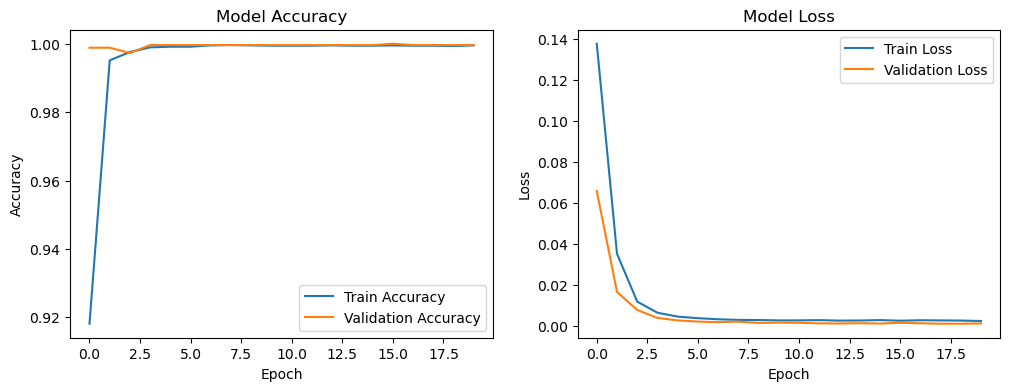

In [138]:
import matplotlib.pyplot as plt

# Supposons que `history` est l'objet renvoyé par l'entraînement de votre modèle
# Exemple : history = model.fit(...)

# Tracer la précision de l'entraînement et de la validation
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Tracer la perte de l'entraînement et de la validation
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

# Afficher les graphiques
plt.show()


In [139]:
import string
def predict_sql_injection(query):
    length=len(query)
    ponctuation_chars=set(string.punctuation)
    punctuation_count=0
    number_of_key=0
    key_words=["select", "update", "insert", "create", "drop", "alter", "rename", "exec", "order", "group", "sleep","count","where"]

    for char in query:
        if char in ponctuation_chars:
            punctuation_count+=1
    for char in query:
        if char in key_words:
            number_of_key+=1
    features=np.array([length,punctuation_count,number_of_key]).reshape(1,1,3)
    prediction=model.predict(features)
    if(prediction>=0.5):
            return "SQL Injection"
    else:
            return "No Sql Injection"
    

In [58]:
# model.save('malaria_model.h5')

NameError: name 'model' is not defined

In [143]:
predict_sql_injection("Mohammed benaaouinate MOHA")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


'SQL Injection'

In [60]:
# model=tf.keras.models.load_model("./malaria_model.h5")

In [140]:
# model.summary()

In [144]:
df.Label.value_counts()

1    10870
0     2017
Name: Label, dtype: int64